# Concrete Strength Prediction with Neural Networks

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Creating own data with scikit learn

In [47]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=30, n_samples=5000, noise=10, random_state=42)

In [49]:
X

array([[ 0.73579588,  1.04112706, -0.87140389, ..., -1.28557712,
         0.8309933 , -1.58487991],
       [-0.108076  ,  2.32106851,  2.29221164, ...,  0.68131372,
        -2.40173397, -1.18387309],
       [ 0.30806463, -0.82467886,  1.38549697, ...,  1.4745775 ,
        -0.86784344, -0.11117936],
       ...,
       [ 0.46886758,  0.94334516,  0.44395667, ...,  1.35342463,
         0.09998062, -0.7785281 ],
       [ 0.75775478,  0.43412698, -0.12148711, ..., -0.97502138,
         1.3888001 ,  0.36543184],
       [-0.11071739, -0.60025471, -0.13589803, ...,  0.00344785,
         1.33576046,  1.48514776]])

In [50]:
X.shape

(5000, 30)

In [51]:
Y.shape

(5000,)

In [52]:
cols = [f'x{i}' for i in range(30)]

In [53]:
cols

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29']

In [54]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.735796,1.041127,-0.871404,0.508606,-0.636648,1.332272,-0.503400,1.374134,1.270885,1.988603,...,0.317767,2.951914,-0.248546,-0.870800,-1.569923,0.395626,1.066135,-1.285577,0.830993,-1.584880
1,-0.108076,2.321069,2.292212,1.122974,0.558116,-0.328548,1.750118,-0.534911,0.213996,0.364157,...,0.081067,0.497429,0.824820,0.205803,-0.622931,-0.853174,0.924574,0.681314,-2.401734,-1.183873
2,0.308065,-0.824679,1.385497,1.927543,0.236301,0.562039,0.465317,-1.171702,0.346263,-0.152707,...,-0.834410,-1.240574,-0.722814,-0.107633,0.424254,-1.886220,2.157491,1.474577,-0.867843,-0.111179
3,-0.837979,-0.001572,-0.879153,-0.215569,0.108785,1.122969,-1.351074,0.652168,-0.142286,-0.348107,...,-0.861413,-1.071020,0.300968,-0.835940,0.410507,-0.308762,0.009512,1.576850,-0.367144,-0.796132
4,-0.252247,-0.407280,1.432967,-0.489814,-0.154190,0.385624,1.356910,1.209124,2.927645,-0.156261,...,-0.318957,3.536532,1.391892,0.385200,-0.620109,1.764385,-0.765251,0.003286,0.170299,-0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531823,-0.753699,-0.526386,-0.134938,-0.572953,-0.259428,-0.491569,-0.442929,0.767339,-0.807009,...,-0.451589,-2.689713,0.236172,-2.629400,1.804714,0.158483,0.457955,0.665615,1.110167,0.672384
4996,0.378681,0.842819,-0.146172,-1.625534,-0.955834,0.185233,-1.016409,1.275818,-1.631155,-1.343036,...,0.096142,0.726612,-0.280988,-0.070456,1.671552,-0.261690,1.142516,-0.998338,0.523002,1.496653
4997,0.468868,0.943345,0.443957,-0.671411,-0.117502,0.544626,0.348450,0.553522,0.505444,-0.346620,...,0.378791,0.449205,0.890035,-1.157446,0.979357,0.497428,-0.312307,1.353425,0.099981,-0.778528
4998,0.757755,0.434127,-0.121487,-0.217615,-0.088260,-0.355547,-0.803803,0.893347,0.145759,-1.258296,...,-0.441476,1.075934,0.511556,0.737071,1.306280,1.712308,-1.226916,-0.975021,1.388800,0.365432


In [55]:
Y=pd.DataFrame(Y)
Y.columns = ['Y']
Y

,Y
0,150.973830
1,34.772072
2,-254.332036
3,67.563592
4,371.994270
...,...
4995,-75.457805
4996,214.869422
4997,281.812602
4998,197.266648


### Create preprocessing pipeline for X

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [57]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [58]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.74522802,  1.05648626, -0.90506965, ..., -1.30803257,
         0.84170597, -1.57717141],
       [-0.10350458,  2.31911253,  2.31665157, ...,  0.67291129,
        -2.37529169, -1.17462579],
       [ 0.31503302, -0.78407885,  1.3932834 , ...,  1.47184277,
        -0.84886467, -0.09781578],
       ...,
       [ 0.47676221,  0.96002717,  0.43444996, ...,  1.3498243 ,
         0.11425021, -0.76772536],
       [ 0.7673134 ,  0.45769774, -0.14137924, ..., -0.99525798,
         1.39679863,  0.38062434],
       [-0.10616118, -0.56269073, -0.15605485, ..., -0.00979779,
         1.34401706,  1.50463697]])

In [59]:
cols = num_pipe.get_feature_names_out()
cols

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29'], dtype=object)

In [60]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.745228,1.056486,-0.905070,0.519462,-0.639618,1.338450,-0.481092,1.363730,1.263597,1.958957,...,0.327146,2.928869,-0.272461,-0.845469,-1.578828,0.378638,1.069910,-1.308033,0.841706,-1.577171
1,-0.103505,2.319113,2.316652,1.141287,0.551350,-0.326713,1.759410,-0.546866,0.203975,0.352701,...,0.088325,0.492024,0.809076,0.194107,-0.632590,-0.855621,0.928962,0.672911,-2.375292,-1.174626
2,0.315033,-0.784079,1.393283,1.955622,0.230558,0.566203,0.482029,-1.184175,0.336584,-0.158376,...,-0.835351,-1.233488,-0.750340,-0.108549,0.413763,-1.876639,2.156540,1.471843,-0.848865,-0.097816
3,-0.837612,0.027893,-0.912961,-0.213504,0.103447,1.128600,-1.323870,0.641177,-0.153228,-0.351588,...,-0.862595,-1.065153,0.281236,-0.811807,0.400026,-0.317548,0.017862,1.574846,-0.350601,-0.785396
4,-0.248506,-0.372327,1.441625,-0.491078,-0.158693,0.389326,1.368473,1.198586,2.924641,-0.161889,...,-0.315281,3.509286,1.380466,0.367333,-0.629769,1.731461,-0.753547,-0.009961,0.184226,-0.894872


### Train Test split

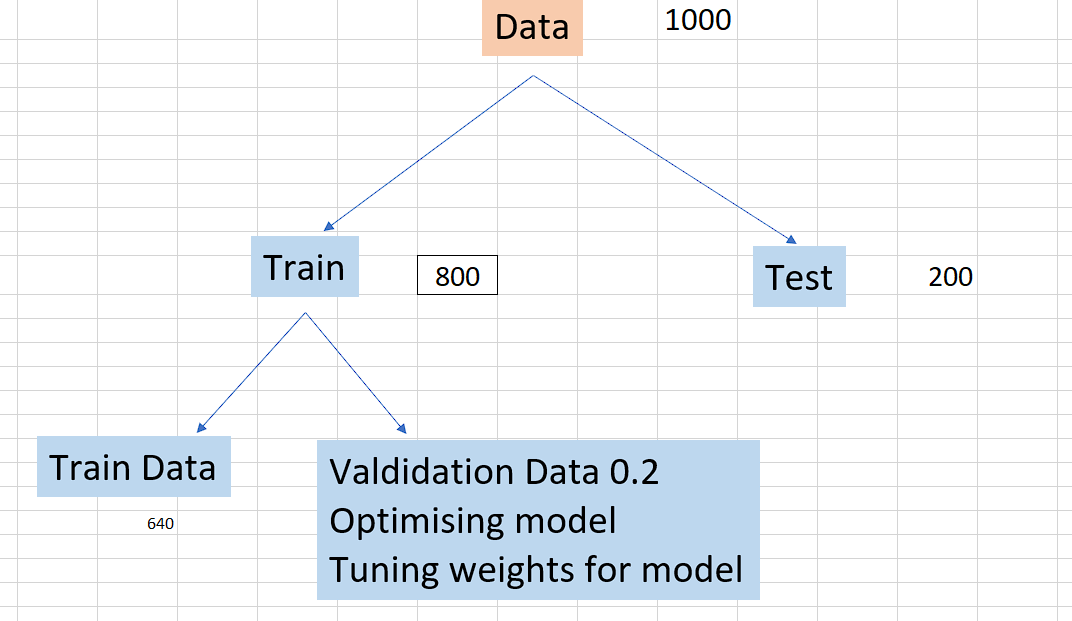

In [61]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest  = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [62]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
4227,-1.711500,-0.974283,2.148708,1.146298,0.005667,0.195566,-0.383993,-0.718080,0.386160,0.836130,...,-0.038466,-0.586292,-0.755515,1.123953,0.481978,-0.486258,0.334790,0.492318,-0.331858,-0.342493
4676,0.172312,-0.970151,-1.179572,-0.638740,-0.422951,0.177145,0.573145,1.813015,-1.607622,-0.210241,...,0.634777,1.713791,-0.022969,-0.378341,0.832926,-0.503255,0.237117,-0.149347,0.496145,0.754362
800,-1.492289,1.229383,-0.018078,-0.330406,-0.371915,1.970379,-0.418413,0.938733,-2.671832,0.913192,...,1.204552,0.116447,-1.738264,-1.584350,0.806748,0.271933,0.243712,1.454942,-0.461815,-1.043920
3671,0.915208,-0.514593,0.540443,-1.099790,2.368460,-0.297468,-0.562002,0.908696,-1.896036,-0.194337,...,-1.940698,-0.578662,0.707078,0.542981,-0.463365,-0.548334,-1.093015,0.286737,-1.080500,0.341760
4193,-0.887632,0.544564,-0.925896,0.256488,-1.976681,-0.632713,-0.212875,-1.303906,-0.842213,1.017362,...,-1.244223,0.173869,-1.161800,-0.959832,0.309585,-0.131386,-1.678463,-1.296317,-0.200358,0.692108


In [63]:
xtest.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
1501,-0.681669,-0.281059,2.761616,-1.400011,-1.530909,-0.691941,-0.345960,-1.165733,-0.977374,1.478053,...,0.065161,-0.574885,1.219792,-0.408543,0.410107,0.152741,-0.649394,-0.099675,-0.689437,0.316981
2586,-0.324089,-0.272152,0.131552,1.071197,-0.411231,-0.624608,-0.307337,-0.742311,-0.385733,0.749045,...,-0.022851,0.211214,-0.328267,0.025272,0.292487,1.457876,-0.003496,-1.953557,-1.208221,1.142259
2653,1.266622,0.356315,-2.476023,-0.637571,-0.971267,0.664652,0.223826,-0.643297,1.608720,2.256304,...,-0.898993,-1.080242,0.006157,1.155127,2.669230,-1.679951,1.550418,0.778363,-0.765626,-1.815478
1055,1.352776,-0.123473,-0.496008,0.493306,0.947843,0.275741,-0.338589,-1.573045,-2.225637,0.621801,...,1.037722,1.577578,-1.077313,-1.397536,-0.502970,0.760472,-1.593517,0.063864,-0.829425,1.452322
705,-0.669097,0.582714,0.583174,-0.958410,0.875485,0.029174,0.370883,1.022421,1.194240,-0.798537,...,-0.772146,-1.593999,0.447282,0.945441,-0.336529,1.797089,1.423586,0.315882,-1.119409,1.249510


In [64]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [65]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


In [66]:
xtrain.shape

(4000, 30)

In [67]:
xtest.shape

(1000, 30)

In [68]:
xtrain.shape[1]

30

### Create a Neural network

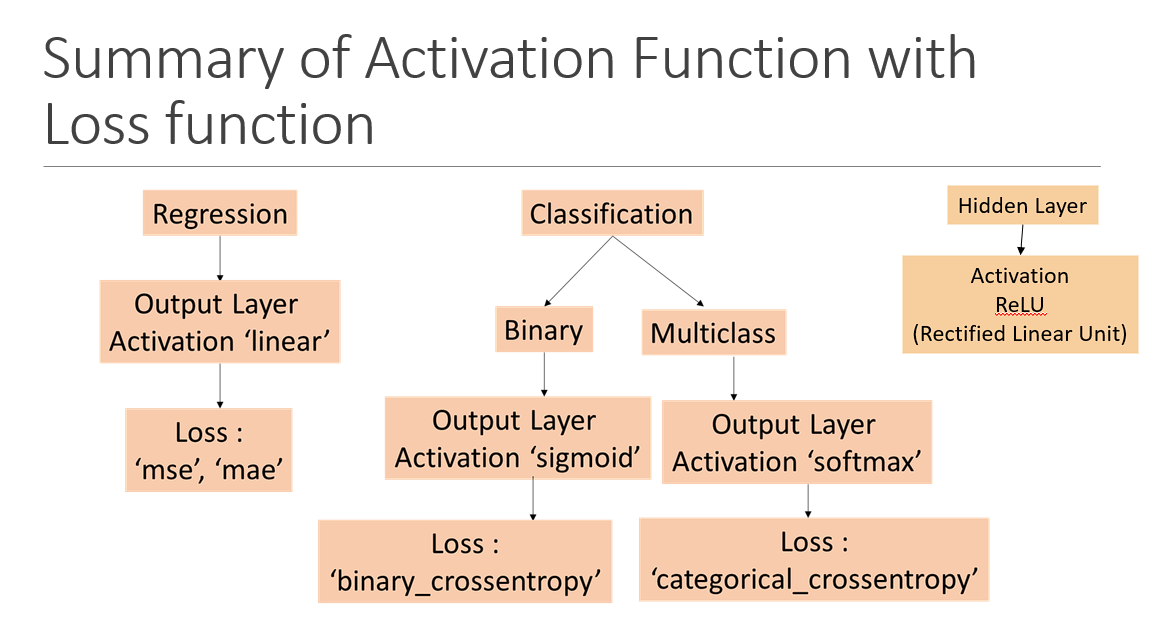

In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
# Initialize Sequential Model
model = Sequential()

# Create Hidden Layer 1
model.add(Dense(units=32, activation='relu', input_dim=xtrain.shape[1]))

# Create Hidden Layer 2
model.add(Dense(units=16, activation='relu'))

# Create Hidden Layer 3
model.add(Dense(units=8, activation='relu'))

# Create output Layer
model.add(Dense(units=1, activation='linear'))

### Compile the model

In [71]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Fit the model

In [72]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 31106.8594 - mae: 141.4624 - val_loss: 30691.1172 - val_mae: 142.1388
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 29140.4727 - mae: 136.5322 - val_loss: 25764.3633 - val_mae: 129.3895
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 17758.9453 - mae: 102.6685 - val_loss: 8094.5132 - val_mae: 68.0237
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 2936.1184 - mae: 37.4558 - val_loss: 811.9489 - val_mae: 21.6940
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 525.1755 - mae: 17.4851 - val_loss: 368.0753 - val_mae: 14.9704
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 317.5388 - mae: 13.9343 - val_loss: 280.8409 - val_mae: 13.4393
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 270.0083 - mae: 12.9247 - val_loss: 258.6679 - val_mae: 12.8822
Epoch 8/10

In [73]:
hist.history['loss']

[31106.859375,
 29140.47265625,
 17758.9453125,
 2936.118408203125,
 525.175537109375,
 317.5387878417969,
 270.00830078125,
 253.22093200683594,
 241.85220336914062,
 233.1494140625,
 223.0859375,
 218.07652282714844,
 208.34059143066406,
 197.52481079101562,
 191.21258544921875,
 183.8097686767578,
 174.2523956298828,
 167.85430908203125,
 159.80726623535156,
 154.91993713378906,
 148.69757080078125,
 142.14964294433594,
 138.80731201171875,
 132.20428466796875,
 128.76832580566406,
 124.65949249267578,
 120.5195083618164,
 118.13410186767578,
 116.89630126953125,
 114.04013061523438,
 111.15339660644531,
 109.70655059814453,
 108.22167205810547,
 105.74151611328125,
 104.551025390625,
 103.7334213256836,
 101.79430389404297,
 101.13036346435547,
 100.49288177490234,
 98.36258697509766,
 99.35354614257812,
 96.16435241699219,
 96.56610107421875,
 94.92511749267578,
 94.61302947998047,
 93.07669830322266,
 92.90928649902344,
 92.44359588623047,
 90.73667907714844,
 90.76428985595703,


In [75]:
hist.history['val_loss']

[30691.1171875,
 25764.36328125,
 8094.51318359375,
 811.9488525390625,
 368.0753173828125,
 280.8409423828125,
 258.6679382324219,
 244.69119262695312,
 239.5993194580078,
 230.0436553955078,
 224.51734924316406,
 218.75112915039062,
 217.16064453125,
 208.31117248535156,
 201.37823486328125,
 194.7333221435547,
 188.99441528320312,
 183.6207275390625,
 180.36537170410156,
 176.51654052734375,
 170.04971313476562,
 163.49038696289062,
 160.42054748535156,
 156.20632934570312,
 156.6483154296875,
 155.2633056640625,
 150.25819396972656,
 146.7584228515625,
 145.5784149169922,
 143.3063201904297,
 140.01193237304688,
 148.5529327392578,
 139.71597290039062,
 138.13339233398438,
 138.2542724609375,
 142.30609130859375,
 137.91824340820312,
 136.4279022216797,
 136.35971069335938,
 137.09104919433594,
 135.89999389648438,
 133.80392456054688,
 138.4213409423828,
 133.96168518066406,
 134.71080017089844,
 131.77919006347656,
 134.52639770507812,
 133.32608032226562,
 135.85447692871094,
 1

In [74]:
hist.history['mae']

[141.46243286132812,
 136.5321807861328,
 102.66846466064453,
 37.455772399902344,
 17.485124588012695,
 13.934330940246582,
 12.924737930297852,
 12.56771469116211,
 12.303122520446777,
 12.103198051452637,
 11.845948219299316,
 11.677088737487793,
 11.454671859741211,
 11.201286315917969,
 10.990804672241211,
 10.784882545471191,
 10.477442741394043,
 10.326305389404297,
 10.067365646362305,
 9.907245635986328,
 9.70557689666748,
 9.507813453674316,
 9.356026649475098,
 9.172686576843262,
 9.046794891357422,
 8.872300148010254,
 8.757278442382812,
 8.638238906860352,
 8.634106636047363,
 8.513895034790039,
 8.381616592407227,
 8.345930099487305,
 8.30049991607666,
 8.200787544250488,
 8.143790245056152,
 8.11999225616455,
 8.003395080566406,
 7.991973876953125,
 7.9371418952941895,
 7.88493537902832,
 7.94259786605835,
 7.809821605682373,
 7.832536697387695,
 7.715179920196533,
 7.731022357940674,
 7.6734209060668945,
 7.626070499420166,
 7.643975257873535,
 7.581010818481445,
 7.553

In [76]:
hist.history['val_mae']

[142.1387939453125,
 129.3895263671875,
 68.02373504638672,
 21.69397735595703,
 14.970414161682129,
 13.439338684082031,
 12.882197380065918,
 12.568138122558594,
 12.39847183227539,
 12.187765121459961,
 12.022866249084473,
 11.794952392578125,
 11.854442596435547,
 11.673942565917969,
 11.319640159606934,
 11.17133903503418,
 11.074105262756348,
 10.802599906921387,
 10.666716575622559,
 10.515785217285156,
 10.33104133605957,
 10.098971366882324,
 10.06535816192627,
 9.804823875427246,
 9.809324264526367,
 9.814870834350586,
 9.653505325317383,
 9.436810493469238,
 9.387653350830078,
 9.394840240478516,
 9.219385147094727,
 9.55324935913086,
 9.190287590026855,
 9.192344665527344,
 9.211161613464355,
 9.285867691040039,
 9.205204010009766,
 9.127028465270996,
 9.131895065307617,
 9.155740737915039,
 9.094898223876953,
 9.073897361755371,
 9.253613471984863,
 9.05549430847168,
 9.110114097595215,
 8.940544128417969,
 9.17209529876709,
 9.048748016357422,
 9.162816047668457,
 9.04128

### Plot the learning curve

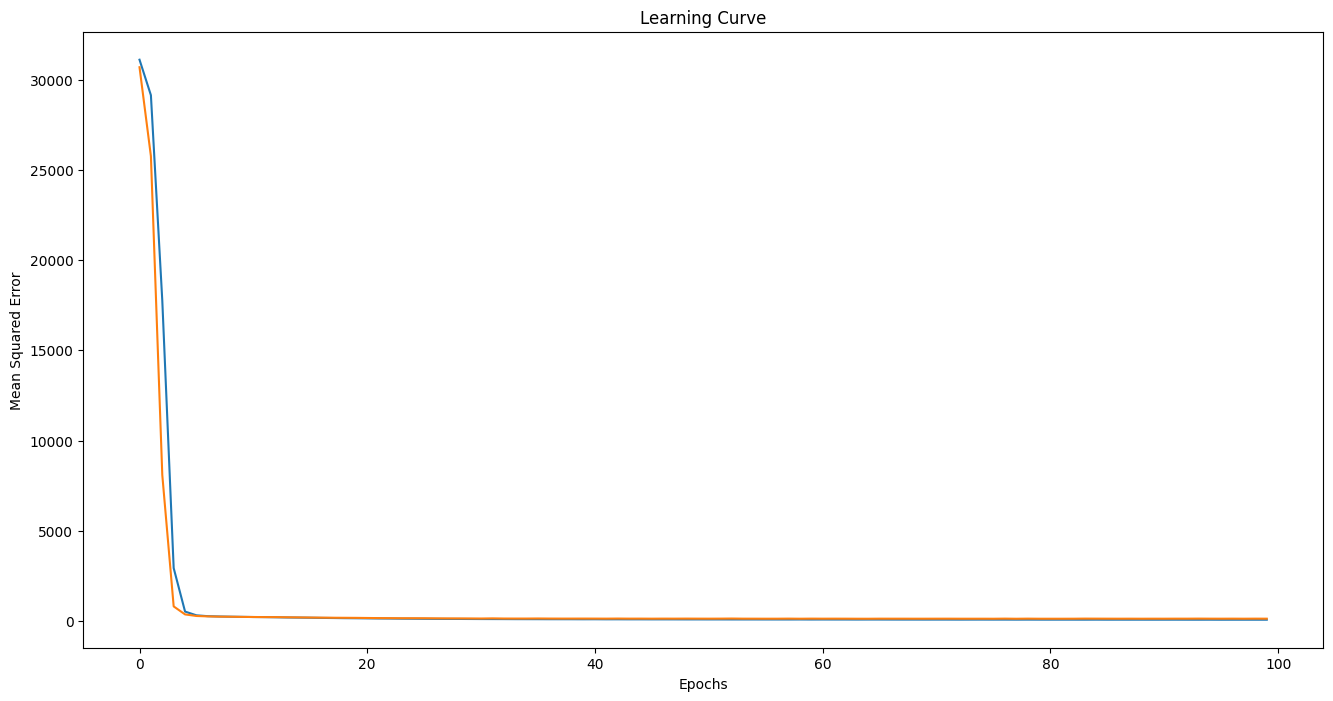

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'], label='Training MSE')
plt.plot(hist.history['val_loss'], label='Valdiation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

### Predict values for train and test

In [78]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 871us/step


In [79]:
ypred_tr[0:5]

array([[ -54.0752 ],
       [ -76.37442],
       [-321.59766],
       [-286.84027],
       [-283.31876]], dtype=float32)

In [80]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [81]:
ypred_ts[0:5]

array([[-203.34598 ],
       [ -72.8524  ],
       [  52.659046],
       [-279.07874 ],
       [  18.936432]], dtype=float32)

In [82]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


### Evaluate model based on different metrics

In [83]:
model.evaluate(xtrain, ytrain)

  1/125 [..............................] - ETA: 2s - loss: 52.8680 - mae: 5.9115

125/125 [==============================] - 0s 937us/step - loss: 82.8298 - mae: 7.1153


[82.82978820800781, 7.115291595458984]

In [84]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 0s 984us/step - loss: 127.7635 - mae: 8.9649


[127.7635269165039, 8.964895248413086]

### Check r2 score for train and test

In [85]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_tr)

0.9973425579209795

In [86]:
r2_score(ytest, ypred_ts)

0.9959526268063077

### Save the above model

In [87]:
model.save('RegressionModel.keras')

### Load The model

In [88]:
from keras.models import load_model

In [89]:
nn = load_model('RegressionModel.keras')
nn

In [90]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                992       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
